In [325]:
import numpy as np
import pandas as pd
import datetime as dt

In [326]:
# import dataset
crimes = pd.read_csv("Dirty_Data/crime.csv", encoding='latin-1', engine='python')

In [327]:
crimes.head()

,incident_id,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,VICTIM_COUNT
0,20226000193,20226000193299900,2999,0,criminal-mischief-other,public-disorder,1/4/2022 11:30:00 AM,1/4/2022 12:00:00 PM,1/4/2022 8:36:00 PM,128 S CANOSA CT,3135366.0,1685410.0,-105.018825,39.714268,4.0,411.0,valverde,1,0,1
1,20223319,20223319299900,2999,0,criminal-mischief-other,public-disorder,1/3/2022 6:45:00 AM,NaN,1/3/2022 11:01:00 AM,650 15TH ST,3142454.0,1696151.0,-104.993418,39.743649,6.0,611.0,cbd,1,0,1
2,20223093,20223093299900,2999,0,criminal-mischief-other,public-disorder,1/3/2022 1:00:00 AM,NaN,1/3/2022 6:11:00 AM,919 E COLFAX AVE,3147484.0,1694898.0,-104.975557,39.740130,6.0,621.0,north-capitol-hill,1,0,1
3,20224000,20224000299900,2999,0,criminal-mischief-other,public-disorder,1/3/2022 7:47:00 PM,NaN,1/3/2022 9:12:00 PM,2345 W ALAMEDA AVE,3136478.0,1684414.0,-105.014892,39.711518,4.0,411.0,valverde,1,0,1
4,20223956,20223956299900,2999,0,criminal-mischief-other,public-disorder,1/3/2022 5:06:00 PM,NaN,1/3/2022 8:31:00 PM,7800 E SMITH RD,3169237.0,1705800.0,-104.897950,39.769688,5.0,512.0,central-park,1,0,1


In [328]:
sum(crimes['FIRST_OCCURRENCE_DATE'].str.endswith("M"))

376812

In [329]:
#convert to date time format
crimes['first_occurrence_date_dt'] = pd.to_datetime(crimes['FIRST_OCCURRENCE_DATE'], format="%m/%d/%Y %I:%M:%S %p")

In [330]:
#convert to ISO format
crimes['first_occurrence_date_isoformat'] = crimes['first_occurrence_date_dt'].apply(dt.datetime.isoformat)

In [331]:
#conversions for reported date
crimes['reported_date_dt'] = pd.to_datetime(crimes['REPORTED_DATE'], format="%m/%d/%Y %I:%M:%S %p")
crimes['reported_date_isoformat'] = crimes['reported_date_dt'].apply(dt.datetime.isoformat)

In [332]:
crimes['OFFENSE_TYPE_ID'].str.startswith(" ").sum() + crimes['OFFENSE_TYPE_ID'].str.endswith(" ").sum()

0

In [333]:
crimes['OFFENSE_CATEGORY_ID'].str.startswith(" ").sum() + crimes['OFFENSE_CATEGORY_ID'].str.endswith(" ").sum()

0

In [334]:
crimes['INCIDENT_ADDRESS'].str.startswith(" ").sum() + crimes['INCIDENT_ADDRESS'].str.endswith(" ").sum()

0

In [335]:
crimes['NEIGHBORHOOD_ID'].str.startswith(" ").sum() + crimes['NEIGHBORHOOD_ID'].str.endswith(" ").sum()

0

In [336]:
crimes['OFFENSE_TYPE_ID_trim'] = crimes.OFFENSE_TYPE_ID.str.strip()
crimes['OFFENSE_CATEGORY_ID_trim'] = crimes.OFFENSE_CATEGORY_ID.str.strip()
crimes['INCIDENT_ADDRESS_trim'] = crimes.INCIDENT_ADDRESS.str.strip()
crimes['NEIGHBORHOOD_ID_trim'] = crimes.NEIGHBORHOOD_ID.str.strip()


In [367]:
sum(crimes['INCIDENT_ADDRESS'].str.endswith(" "))

nan

In [376]:
#crimes_court = crimes[crimes['INCIDENT_ADDRESS_trim'].str.contains("COURT", na=False) | crimes['INCIDENT_ADDRESS_trim'].str.contains("CT", na=False)]
crimes['OFFENSE_CATEGORY_ID'].isna().sum()

0

In [377]:
crimes.head()

,incident_id,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,IS_TRAFFIC,VICTIM_COUNT,first_occurrence_date_dt,first_occurrence_date_isoformat,reported_date_dt,reported_date_isoformat,OFFENSE_TYPE_ID_trim,OFFENSE_CATEGORY_ID_trim,INCIDENT_ADDRESS_trim,NEIGHBORHOOD_ID_trim
0,20226000193,20226000193299900,2999,0,criminal-mischief-other,public-disorder,1/4/2022 11:30:00 AM,1/4/2022 12:00:00 PM,1/4/2022 8:36:00 PM,128 S CANOSA CT,...,0,1,2022-01-04 11:30:00,2022-01-04T11:30:00,2022-01-04 20:36:00,2022-01-04T20:36:00,criminal-mischief-other,public-disorder,128 S CANOSA CT,valverde
1,20223319,20223319299900,2999,0,criminal-mischief-other,public-disorder,1/3/2022 6:45:00 AM,NaN,1/3/2022 11:01:00 AM,650 15TH ST,...,0,1,2022-01-03 06:45:00,2022-01-03T06:45:00,2022-01-03 11:01:00,2022-01-03T11:01:00,criminal-mischief-other,public-disorder,650 15TH ST,cbd
2,20223093,20223093299900,2999,0,criminal-mischief-other,public-disorder,1/3/2022 1:00:00 AM,NaN,1/3/2022 6:11:00 AM,919 E COLFAX AVE,...,0,1,2022-01-03 01:00:00,2022-01-03T01:00:00,2022-01-03 06:11:00,2022-01-03T06:11:00,criminal-mischief-other,public-disorder,919 E COLFAX AVE,north-capitol-hill
3,20224000,20224000299900,2999,0,criminal-mischief-other,public-disorder,1/3/2022 7:47:00 PM,NaN,1/3/2022 9:12:00 PM,2345 W ALAMEDA AVE,...,0,1,2022-01-03 19:47:00,2022-01-03T19:47:00,2022-01-03 21:12:00,2022-01-03T21:12:00,criminal-mischief-other,public-disorder,2345 W ALAMEDA AVE,valverde
4,20223956,20223956299900,2999,0,criminal-mischief-other,public-disorder,1/3/2022 5:06:00 PM,NaN,1/3/2022 8:31:00 PM,7800 E SMITH RD,...,0,1,2022-01-03 17:06:00,2022-01-03T17:06:00,2022-01-03 20:31:00,2022-01-03T20:31:00,criminal-mischief-other,public-disorder,7800 E SMITH RD,central-park


In [236]:
crimes['INCIDENT_ADDRESS_trim'].str.contains(r'[^\w\s]|_', regex=True).sum()

32305

In [237]:
#remove special characters from incident_address_trim 
crimes['INCIDENT_ADDRESS_trim'] = crimes['INCIDENT_ADDRESS_trim'].replace(r'[^\w\s]|_', '', regex=True)

In [238]:
crimes['INCIDENT_ADDRESS_trim'].str.contains(r'[^\w\s]|_', regex=True).sum()

0

In [239]:
crimes['INCIDENT_ADDRESS_trim'].head()

0       128 S CANOSA CT
1           650 15TH ST
2      919 E COLFAX AVE
3    2345 W ALAMEDA AVE
4       7800 E SMITH RD
Name: INCIDENT_ADDRESS_trim, dtype: object

In [240]:
list(crimes)

['incident_id',
 'offense_id',
 'OFFENSE_CODE',
 'OFFENSE_CODE_EXTENSION',
 'OFFENSE_TYPE_ID',
 'OFFENSE_CATEGORY_ID',
 'FIRST_OCCURRENCE_DATE',
 'LAST_OCCURRENCE_DATE',
 'REPORTED_DATE',
 'INCIDENT_ADDRESS',
 'GEO_X',
 'GEO_Y',
 'GEO_LON',
 'GEO_LAT',
 'DISTRICT_ID',
 'PRECINCT_ID',
 'NEIGHBORHOOD_ID',
 'IS_CRIME',
 'IS_TRAFFIC',
 'VICTIM_COUNT',
 'first_occurrence_date_dt',
 'first_occurrence_date_isoformat',
 'reported_date_dt',
 'reported_date_isoformat',
 'OFFENSE_TYPE_ID_trim',
 'OFFENSE_CATEGORY_ID_trim',
 'INCIDENT_ADDRESS_trim',
 'NEIGHBORHOOD_ID_trim']

In [241]:
#dropping columns
crimes = crimes.drop(columns=['LAST_OCCURRENCE_DATE','FIRST_OCCURRENCE_DATE','REPORTED_DATE','OFFENSE_TYPE_ID','OFFENSE_CATEGORY_ID','INCIDENT_ADDRESS','NEIGHBORHOOD_ID'])

In [242]:
list(crimes)

['incident_id',
 'offense_id',
 'OFFENSE_CODE',
 'OFFENSE_CODE_EXTENSION',
 'GEO_X',
 'GEO_Y',
 'GEO_LON',
 'GEO_LAT',
 'DISTRICT_ID',
 'PRECINCT_ID',
 'IS_CRIME',
 'IS_TRAFFIC',
 'VICTIM_COUNT',
 'first_occurrence_date_dt',
 'first_occurrence_date_isoformat',
 'reported_date_dt',
 'reported_date_isoformat',
 'OFFENSE_TYPE_ID_trim',
 'OFFENSE_CATEGORY_ID_trim',
 'INCIDENT_ADDRESS_trim',
 'NEIGHBORHOOD_ID_trim']

In [243]:
crimes.rename(columns = {'INCIDENT_ADDRESS_trim':'INCIDENT_STREET'}, inplace = True)


In [244]:
crimes.head()

,incident_id,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,...,IS_TRAFFIC,VICTIM_COUNT,first_occurrence_date_dt,first_occurrence_date_isoformat,reported_date_dt,reported_date_isoformat,OFFENSE_TYPE_ID_trim,OFFENSE_CATEGORY_ID_trim,INCIDENT_STREET,NEIGHBORHOOD_ID_trim
0,20226000193,20226000193299900,2999,0,3135366.0,1685410.0,-105.018825,39.714268,4.0,411.0,...,0,1,2022-01-04 11:30:00,2022-01-04T11:30:00,2022-01-04 20:36:00,2022-01-04T20:36:00,criminal-mischief-other,public-disorder,128 S CANOSA CT,valverde
1,20223319,20223319299900,2999,0,3142454.0,1696151.0,-104.993418,39.743649,6.0,611.0,...,0,1,2022-01-03 06:45:00,2022-01-03T06:45:00,2022-01-03 11:01:00,2022-01-03T11:01:00,criminal-mischief-other,public-disorder,650 15TH ST,cbd
2,20223093,20223093299900,2999,0,3147484.0,1694898.0,-104.975557,39.740130,6.0,621.0,...,0,1,2022-01-03 01:00:00,2022-01-03T01:00:00,2022-01-03 06:11:00,2022-01-03T06:11:00,criminal-mischief-other,public-disorder,919 E COLFAX AVE,north-capitol-hill
3,20224000,20224000299900,2999,0,3136478.0,1684414.0,-105.014892,39.711518,4.0,411.0,...,0,1,2022-01-03 19:47:00,2022-01-03T19:47:00,2022-01-03 21:12:00,2022-01-03T21:12:00,criminal-mischief-other,public-disorder,2345 W ALAMEDA AVE,valverde
4,20223956,20223956299900,2999,0,3169237.0,1705800.0,-104.897950,39.769688,5.0,512.0,...,0,1,2022-01-03 17:06:00,2022-01-03T17:06:00,2022-01-03 20:31:00,2022-01-03T20:31:00,criminal-mischief-other,public-disorder,7800 E SMITH RD,central-park


In [245]:
crimes['NEIGHBORHOOD_ID_trim'].unique()

array(['valverde', 'cbd', 'north-capitol-hill', 'central-park',
       'cory-merrill', 'capitol-hill', 'belcaro', 'lincoln-park',
       'villa-park', 'cheesman-park', 'virginia-village', 'highland',
       'windsor', 'marston', 'five-points', 'west-colfax', 'sun-valley',
       'hampden-south', 'hampden', 'dia', 'university', 'cherry-creek',
       'gateway-green-valley-ranch', 'east-colfax', 'west-highland',
       'mar-lee', 'elyria-swansea', 'union-station', 'university-park',
       'jefferson-park', 'washington-park', 'lowry-field',
       'university-hills', 'goldsmith', 'baker', 'city-park-west',
       'civic-center', 'ruby-hill', 'northeast-park-hill', 'barnum-west',
       'montbello', 'wellshire', 'speer', 'fort-logan', 'bear-valley',
       'overland', 'kennedy', 'harvey-park-south', 'sunnyside',
       'athmar-park', 'hilltop', 'harvey-park', 'clayton', 'westwood',
       'globeville', 'regis', 'hale', 'washington-virginia-vale', 'cole',
       'south-park-hill', 'sloan-l

In [246]:
len(crimes['NEIGHBORHOOD_ID_trim'].unique())

79

In [247]:
#covert neighborhood_ID_trim with name cbd to central business district

crimes['NEIGHBORHOOD_ID_trim'] = crimes['NEIGHBORHOOD_ID_trim'].replace({'cbd':'central-business-district'})

In [248]:
len(crimes['NEIGHBORHOOD_ID_trim'].unique())

79

In [249]:
crimes['NEIGHBORHOOD_ID_trim'].unique()

array(['valverde', 'central-business-district', 'north-capitol-hill',
       'central-park', 'cory-merrill', 'capitol-hill', 'belcaro',
       'lincoln-park', 'villa-park', 'cheesman-park', 'virginia-village',
       'highland', 'windsor', 'marston', 'five-points', 'west-colfax',
       'sun-valley', 'hampden-south', 'hampden', 'dia', 'university',
       'cherry-creek', 'gateway-green-valley-ranch', 'east-colfax',
       'west-highland', 'mar-lee', 'elyria-swansea', 'union-station',
       'university-park', 'jefferson-park', 'washington-park',
       'lowry-field', 'university-hills', 'goldsmith', 'baker',
       'city-park-west', 'civic-center', 'ruby-hill',
       'northeast-park-hill', 'barnum-west', 'montbello', 'wellshire',
       'speer', 'fort-logan', 'bear-valley', 'overland', 'kennedy',
       'harvey-park-south', 'sunnyside', 'athmar-park', 'hilltop',
       'harvey-park', 'clayton', 'westwood', 'globeville', 'regis',
       'hale', 'washington-virginia-vale', 'cole', 'sout

In [250]:
#print all rows with neighbourhood_ID_trim with nan

crimes[crimes['NEIGHBORHOOD_ID_trim'].isna()]

,incident_id,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,...,IS_TRAFFIC,VICTIM_COUNT,first_occurrence_date_dt,first_occurrence_date_isoformat,reported_date_dt,reported_date_isoformat,OFFENSE_TYPE_ID_trim,OFFENSE_CATEGORY_ID_trim,INCIDENT_STREET,NEIGHBORHOOD_ID_trim
359405,2022307631,2022307631299900,2999,0,3147195.0,1695029.0,NaN,NaN,NaN,NaN,...,0,1,2022-06-17 19:33:00,2022-06-17T19:33:00,2022-06-17 20:06:00,2022-06-17T20:06:00,criminal-mischief-other,public-disorder,857 E COLFAX AVE,NaN
359409,2022308867,2022308867299900,2999,0,3174073.0,1689429.0,NaN,NaN,NaN,NaN,...,0,1,2022-06-18 12:44:00,2022-06-18T12:44:00,2022-06-18 14:34:00,2022-06-18T14:34:00,criminal-mischief-other,public-disorder,9100 E LOWRY BLVD,NaN
359410,2022305932,2022305932299900,2999,0,3142958.0,1672196.0,NaN,NaN,NaN,NaN,...,0,1,2022-06-16 23:35:00,2022-06-16T23:35:00,2022-06-16 23:35:00,2022-06-16T23:35:00,criminal-mischief-other,public-disorder,2140 S DELAWARE ST,NaN
359412,2022310449,2022310449299900,2999,0,3184346.0,1712762.0,NaN,NaN,NaN,NaN,...,0,1,2022-06-19 09:25:00,2022-06-19T09:25:00,2022-06-19 11:17:00,2022-06-19T11:17:00,criminal-mischief-other,public-disorder,5063 N SCRANTON ST,NaN
359413,20226011416,20226011416299900,2999,0,3209045.0,1711845.0,NaN,NaN,NaN,NaN,...,0,1,2022-06-18 20:00:00,2022-06-18T20:00:00,2022-06-19 18:48:00,2022-06-19T18:48:00,criminal-mischief-other,public-disorder,4853 N HALIFAX CT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360347,20226011252,20226011252260900,2609,0,3130968.0,1686400.0,NaN,NaN,NaN,NaN,...,0,1,2022-06-11 12:45:00,2022-06-11T12:45:00,2022-06-16 10:50:00,2022-06-16T10:50:00,fraud-by-use-of-computer,white-collar-crime,20 N LOWELL BLVD,NaN
360348,2022300759,2022300759260900,2609,0,3140838.0,1694464.0,NaN,NaN,NaN,NaN,...,0,1,2022-05-31 00:00:00,2022-05-31T00:00:00,2022-06-14 11:00:00,2022-06-14T11:00:00,fraud-by-use-of-computer,white-collar-crime,901 W 14TH AVE,NaN
360349,2022306766,2022306766260900,2609,0,3163327.0,1709344.0,NaN,NaN,NaN,NaN,...,0,1,2022-04-28 08:00:00,2022-04-28T08:00:00,2022-06-17 13:27:00,2022-06-17T13:27:00,fraud-by-use-of-computer,white-collar-crime,5885 E STAPLETON N DR,NaN
360351,20228026207,20228026207269903,2699,3,3223441.0,1728516.0,NaN,NaN,NaN,NaN,...,0,1,2022-06-18 06:07:00,2022-06-18T06:07:00,2022-06-18 07:32:00,2022-06-18T07:32:00,theft-of-services,larceny,24300 E 75TH AVE,NaN


In [251]:
# get avg latlon of neighborhood. Not geodesic, but sufficient for approximation.

avg_neighborhood_locations = crimes.groupby(['NEIGHBORHOOD_ID_trim'],as_index=False)['GEO_X','GEO_Y'].mean()

# calculate haversine distance / great circle distance between each incident location and all other average neighborhood locations
# https://en.wikipedia.org/wiki/Haversine_formula
# credit: https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas/29546836#29546836

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km


dist_df = crimes[crimes['NEIGHBORHOOD_ID_trim'].isna()][['incident_id','GEO_X','GEO_Y']].merge(avg_neighborhood_locations,how='cross')

dist_df['dist_km'] = haversine_np(dist_df['GEO_Y_x'],dist_df['GEO_X_x'],dist_df['GEO_Y_y'],dist_df['GEO_X_x'])

# get nearest neighborhood for each incident
nearest_neighborhoods = dist_df.sort_values(['dist_km'],ascending=True).groupby('incident_id',as_index=False).first().rename(columns={'NEIGHBORHOOD_ID_trim':'nearest_neighborhood','dist_km':'nearest_neighborhood_dist_km'})[['incident_id','nearest_neighborhood','nearest_neighborhood_dist_km']]

# merge back in to crimes dataset
crimes = crimes.merge(nearest_neighborhoods,on='incident_id',how='left')

crimes['nearest_neighborhood'] = np.where(crimes['nearest_neighborhood'].isna(),crimes['NEIGHBORHOOD_ID_trim'],crimes['nearest_neighborhood'])

# fill in known neighborhoods w/ a dist of 0
crimes['nearest_neighborhood_dist_km'] = np.where(crimes['nearest_neighborhood_dist_km'].isna(),0,crimes['nearest_neighborhood_dist_km'])

C:\Users\AJT\AppData\Local\Temp\ipykernel_3384\1105184232.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_neighborhood_locations = crimes.groupby(['NEIGHBORHOOD_ID_trim'],as_index=False)['GEO_X','GEO_Y'].mean()


In [252]:
crimes[crimes['nearest_neighborhood_dist_km']>0]

,incident_id,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,...,first_occurrence_date_dt,first_occurrence_date_isoformat,reported_date_dt,reported_date_isoformat,OFFENSE_TYPE_ID_trim,OFFENSE_CATEGORY_ID_trim,INCIDENT_STREET,NEIGHBORHOOD_ID_trim,nearest_neighborhood,nearest_neighborhood_dist_km
359405,2022307631,2022307631299900,2999,0,3147195.0,1695029.0,NaN,NaN,NaN,NaN,...,2022-06-17 19:33:00,2022-06-17T19:33:00,2022-06-17 20:06:00,2022-06-17T20:06:00,criminal-mischief-other,public-disorder,857 E COLFAX AVE,NaN,hampden-south,47.158290
359409,2022308867,2022308867299900,2999,0,3174073.0,1689429.0,NaN,NaN,NaN,NaN,...,2022-06-18 12:44:00,2022-06-18T12:44:00,2022-06-18 14:34:00,2022-06-18T14:34:00,criminal-mischief-other,public-disorder,9100 E LOWRY BLVD,NaN,sloan-lake,73.254474
359410,2022305932,2022305932299900,2999,0,3142958.0,1672196.0,NaN,NaN,NaN,NaN,...,2022-06-16 23:35:00,2022-06-16T23:35:00,2022-06-16 23:35:00,2022-06-16T23:35:00,criminal-mischief-other,public-disorder,2140 S DELAWARE ST,NaN,northeast-park-hill,157.756212
359412,2022310449,2022310449299900,2999,0,3184346.0,1712762.0,NaN,NaN,NaN,NaN,...,2022-06-19 09:25:00,2022-06-19T09:25:00,2022-06-19 11:17:00,2022-06-19T11:17:00,criminal-mischief-other,public-disorder,5063 N SCRANTON ST,NaN,cory-merrill,269.985030
359413,20226011416,20226011416299900,2999,0,3209045.0,1711845.0,NaN,NaN,NaN,NaN,...,2022-06-18 20:00:00,2022-06-18T20:00:00,2022-06-19 18:48:00,2022-06-19T18:48:00,criminal-mischief-other,public-disorder,4853 N HALIFAX CT,NaN,university,365.588283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360347,20226011252,20226011252260900,2609,0,3130968.0,1686400.0,NaN,NaN,NaN,NaN,...,2022-06-11 12:45:00,2022-06-11T12:45:00,2022-06-16 10:50:00,2022-06-16T10:50:00,fraud-by-use-of-computer,white-collar-crime,20 N LOWELL BLVD,NaN,valverde,198.819651
360348,2022300759,2022300759260900,2609,0,3140838.0,1694464.0,NaN,NaN,NaN,NaN,...,2022-05-31 00:00:00,2022-05-31T00:00:00,2022-06-14 11:00:00,2022-06-14T11:00:00,fraud-by-use-of-computer,white-collar-crime,901 W 14TH AVE,NaN,sloan-lake,426.267842
360349,2022306766,2022306766260900,2609,0,3163327.0,1709344.0,NaN,NaN,NaN,NaN,...,2022-04-28 08:00:00,2022-04-28T08:00:00,2022-06-17 13:27:00,2022-06-17T13:27:00,fraud-by-use-of-computer,white-collar-crime,5885 E STAPLETON N DR,NaN,globeville,162.040917
360351,20228026207,20228026207269903,2699,3,3223441.0,1728516.0,NaN,NaN,NaN,NaN,...,2022-06-18 06:07:00,2022-06-18T06:07:00,2022-06-18 07:32:00,2022-06-18T07:32:00,theft-of-services,larceny,24300 E 75TH AVE,NaN,valverde,147.331810


In [253]:
crimes

,incident_id,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,...,first_occurrence_date_dt,first_occurrence_date_isoformat,reported_date_dt,reported_date_isoformat,OFFENSE_TYPE_ID_trim,OFFENSE_CATEGORY_ID_trim,INCIDENT_STREET,NEIGHBORHOOD_ID_trim,nearest_neighborhood,nearest_neighborhood_dist_km
0,20226000193,20226000193299900,2999,0,3135366.0,1685410.0,-105.018825,39.714268,4.0,411.0,...,2022-01-04 11:30:00,2022-01-04T11:30:00,2022-01-04 20:36:00,2022-01-04T20:36:00,criminal-mischief-other,public-disorder,128 S CANOSA CT,valverde,valverde,0.0
1,20223319,20223319299900,2999,0,3142454.0,1696151.0,-104.993418,39.743649,6.0,611.0,...,2022-01-03 06:45:00,2022-01-03T06:45:00,2022-01-03 11:01:00,2022-01-03T11:01:00,criminal-mischief-other,public-disorder,650 15TH ST,central-business-district,central-business-district,0.0
2,20223093,20223093299900,2999,0,3147484.0,1694898.0,-104.975557,39.740130,6.0,621.0,...,2022-01-03 01:00:00,2022-01-03T01:00:00,2022-01-03 06:11:00,2022-01-03T06:11:00,criminal-mischief-other,public-disorder,919 E COLFAX AVE,north-capitol-hill,north-capitol-hill,0.0
3,20224000,20224000299900,2999,0,3136478.0,1684414.0,-105.014892,39.711518,4.0,411.0,...,2022-01-03 19:47:00,2022-01-03T19:47:00,2022-01-03 21:12:00,2022-01-03T21:12:00,criminal-mischief-other,public-disorder,2345 W ALAMEDA AVE,valverde,valverde,0.0
4,20223956,20223956299900,2999,0,3169237.0,1705800.0,-104.897950,39.769688,5.0,512.0,...,2022-01-03 17:06:00,2022-01-03T17:06:00,2022-01-03 20:31:00,2022-01-03T20:31:00,criminal-mischief-other,public-disorder,7800 E SMITH RD,central-park,central-park,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376807,20228028363,20228028363260201,2602,1,3227460.0,1730513.0,-104.690050,39.836285,7.0,759.0,...,2022-05-12 12:00:00,2022-05-12T12:00:00,2022-06-30 19:54:00,2022-06-30T19:54:00,theft-fail-return-rent-veh,white-collar-crime,25500 E 78TH AVE,dia,dia,0.0
376808,2022330642,2022330642260700,2607,0,3197023.0,1715016.0,-104.798853,39.794440,5.0,522.0,...,2022-06-29 14:30:00,2022-06-29T14:30:00,2022-06-30 08:45:00,2022-06-30T08:45:00,fraud-by-telephone,white-collar-crime,16133 E 55TH AVE,gateway-green-valley-ranch,gateway-green-valley-ranch,0.0
376809,2022328815,2022328815260900,2609,0,3151707.0,1674265.0,-104.960976,39.683421,3.0,313.0,...,2022-06-21 18:00:00,2022-06-21T18:00:00,2022-06-29 12:38:00,2022-06-29T12:38:00,fraud-by-use-of-computer,white-collar-crime,2225 E BUCHTEL BLVD,university,university,0.0
376810,2022330886,2022330886260900,2609,0,3145991.0,1686577.0,-104.981035,39.717311,3.0,311.0,...,2022-06-30 10:58:00,2022-06-30T10:58:00,2022-06-30 10:58:00,2022-06-30T10:58:00,fraud-by-use-of-computer,white-collar-crime,40 N PENNSYLVANIA ST,speer,speer,0.0


In [314]:
list(crimes['OFFENSE_CATEGORY_ID_trim'].unique())

['public-disorder',
 'drug-alcohol',
 'sexual-assault',
 'all-other-crimes',
 'robbery',
 'other-crimes-against-persons',
 'aggravated-assault',
 'arson',
 'burglary',
 'larceny',
 'theft-from-motor-vehicle',
 'auto-theft',
 'white-collar-crime',
 'murder']

Crime happens year-round, but experts say there is no other season that correlates to the steady increase in crime more than the hot summer months.

A 2014 U.S. Department of Justice report found significant seasonal pattern trends over nearly two decades that experts say lead to more people becoming violent crime victims during June, July and August.

We want to test out the few highlights listed by the DOJ by seasons:

 Seasonal patterns existed in household larceny and burglary
victimization rates. Rates of these household crimes tended
to be higher in the summer than during other seasons of
the year.

 Though rates of motor vehicle theft tended to be lower
in the spring than in the summer, there were few regular
differences between summer, fall, and winter rates.

 When seasonal variations were found for violent
victimization, the differences between the rates of the
highest and lowest season were less than 12%.

 Aggravated assault rates were higher during the summer
than during the winter, spring, and fall. In comparison,
simple assault rates were higher during the fall than during
other seasons of the year.

 Robbery rates did not exhibit seasonal variations.

 Rape and sexual assault victimization rates tended to be
higher during the summer than during the fall and winter.

 Rates of intimate partner violence were higher during the
summer than during the winter, spring, and fall. (Can not validate as this is not recorded in the data)


Source: https://bjs.ojp.gov/content/pub/pdf/spcvt.pdf

array([[<AxesSubplot:title={'center':'first_occurrence_date_dt'}>]],
      dtype=object)

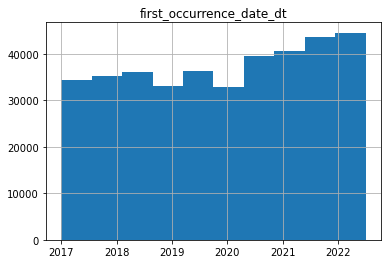

In [255]:
crimes.hist(column='first_occurrence_date_dt')

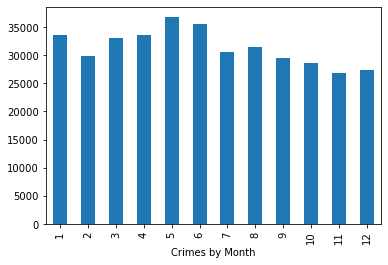

In [315]:

crimes_by_month = crimes["first_occurrence_date_dt"].groupby(crimes["first_occurrence_date_dt"].dt.month, axis=0).count().plot(kind = "bar", xlabel = "Crimes by Month")
#crimes.groupby([crimes["first_occurrence_date_dt"].dt.year, df["first_occurrence_date_dt"].dt.month]).count().plot(kind="bar")


<AxesSubplot:xlabel='Crimes by Month in 2017'>

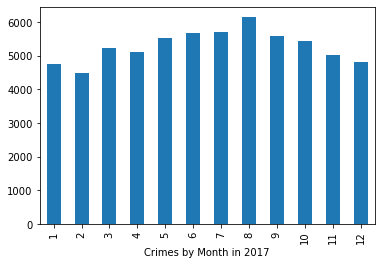

In [317]:
crimes_2017 =crimes[crimes['first_occurrence_date_dt'].dt.year == 2017]
crimes_2017['first_occurrence_date_dt'].groupby(crimes_2017["first_occurrence_date_dt"].dt.month, axis=0).count().plot(kind = "bar", xlabel = "Crimes by Month in 2017")

<AxesSubplot:xlabel='Crimes by Month in 2018'>

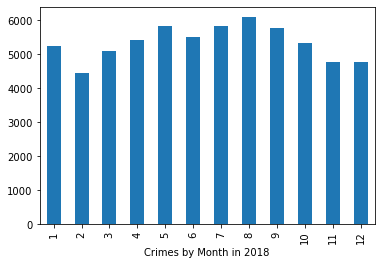

In [316]:
crimes_2018 =crimes[crimes['first_occurrence_date_dt'].dt.year == 2018]
crimes_2018['first_occurrence_date_dt'].groupby(crimes_2018["first_occurrence_date_dt"].dt.month, axis=0).count().plot(kind = "bar", xlabel = "Crimes by Month in 2018")

<AxesSubplot:xlabel='Crimes by Month in 2019'>

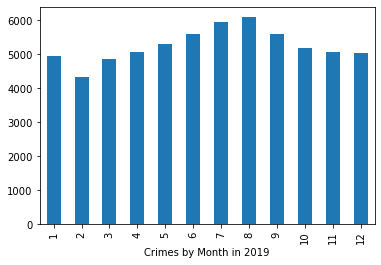

In [318]:
crimes_2019 =crimes[crimes['first_occurrence_date_dt'].dt.year == 2019]
crimes_2019['first_occurrence_date_dt'].groupby(crimes_2019["first_occurrence_date_dt"].dt.month, axis=0).count().plot(kind = "bar", xlabel = "Crimes by Month in 2019")

<AxesSubplot:xlabel='Crimes by Month in 2020'>

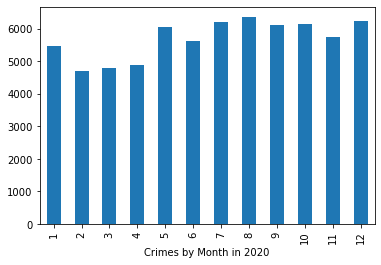

In [319]:
crimes_2020 =crimes[crimes['first_occurrence_date_dt'].dt.year == 2020]
crimes_2020['first_occurrence_date_dt'].groupby(crimes_2020["first_occurrence_date_dt"].dt.month, axis=0).count().plot(kind = "bar", xlabel = "Crimes by Month in 2020")

<AxesSubplot:xlabel='Crimes by Month in 2021'>

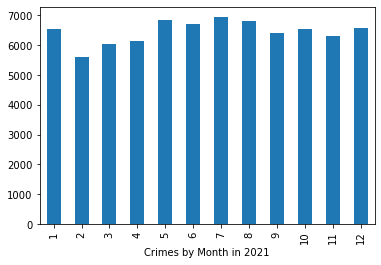

In [320]:
crimes_2021 =crimes[crimes['first_occurrence_date_dt'].dt.year == 2021]
crimes_2021['first_occurrence_date_dt'].groupby(crimes_2021["first_occurrence_date_dt"].dt.month, axis=0).count().plot(kind = "bar", xlabel = "Crimes by Month in 2021")

Larceny/Burglary Crimes 

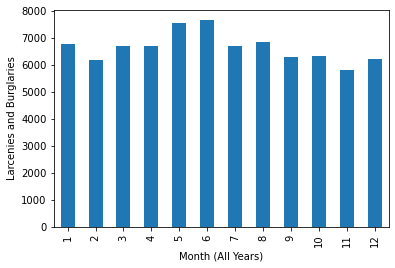

In [298]:
larceny_crimes = crimes[(crimes['OFFENSE_CATEGORY_ID_trim'] == "larceny") | (crimes['OFFENSE_CATEGORY_ID_trim'] == "burglary")]
larceny_crimes_by_month = larceny_crimes["first_occurrence_date_dt"].groupby(larceny_crimes["first_occurrence_date_dt"].dt.month, axis=0).count().plot(kind = "bar", xlabel = "Month (All Years)", ylabel = "Larcenies and Burglaries")

I have a theory that COVID19 affected the seasonal crime rate, so we will test out data before 2020 as well.

In [286]:
crimes_before_2020 =crimes[(crimes['first_occurrence_date_dt'].dt.year < 2020)]


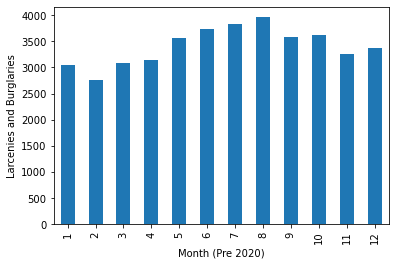

In [297]:
larceny_burglary_crimes_before_2020 = crimes_before_2020[(crimes_before_2020['OFFENSE_CATEGORY_ID_trim'] == "larceny") | (crimes_before_2020['OFFENSE_CATEGORY_ID_trim'] == "burglary")]
larceny_crimes_by_month = larceny_burglary_crimes_before_2020["first_occurrence_date_dt"].groupby(larceny_burglary_crimes_before_2020["first_occurrence_date_dt"].dt.month, axis=0).count().plot(kind = "bar", xlabel = "Month (Pre 2020)", ylabel = "Larcenies and Burglaries")

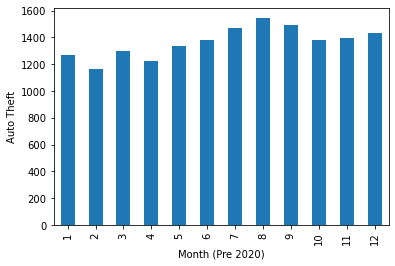

In [305]:
auto_theft_crimes_before_2020 = crimes_before_2020[(crimes_before_2020['OFFENSE_CATEGORY_ID_trim'] == "auto-theft")]
auto_theft_by_month = auto_theft_crimes_before_2020["first_occurrence_date_dt"].groupby(auto_theft_crimes_before_2020["first_occurrence_date_dt"].dt.month, axis=0).count().plot(kind = "bar", xlabel = "Month (Pre 2020)", ylabel = "Auto Theft")

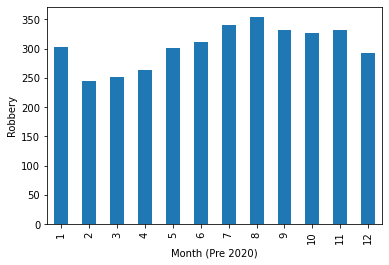

In [306]:
robbery_crimes_before_2020 = crimes_before_2020[(crimes_before_2020['OFFENSE_CATEGORY_ID_trim'] == "robbery")]
robbery_by_month = robbery_crimes_before_2020["first_occurrence_date_dt"].groupby(robbery_crimes_before_2020["first_occurrence_date_dt"].dt.month, axis=0).count().plot(kind = "bar", xlabel = "Month (Pre 2020)", ylabel = "Robbery")

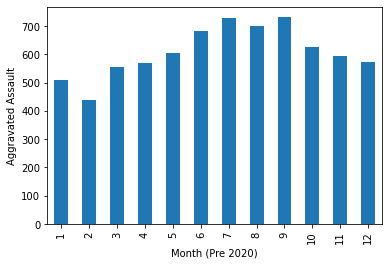

In [310]:
aggravated_assault_before_2020 = crimes_before_2020[(crimes_before_2020['OFFENSE_CATEGORY_ID_trim'] == "aggravated-assault")]
aggravated_assault_by_month = aggravated_assault_before_2020["first_occurrence_date_dt"].groupby(aggravated_assault_before_2020["first_occurrence_date_dt"].dt.month, axis=0).count().plot(kind = "bar", xlabel = "Month (Pre 2020)", ylabel = "Aggravated Assault")

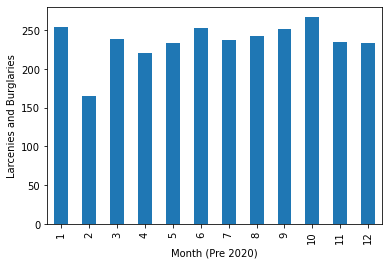

In [304]:
sexual_assault_before_2020 = crimes_before_2020[(crimes_before_2020['OFFENSE_CATEGORY_ID_trim'] == "sexual-assault")]
sexual_assault_by_month = sexual_assault_before_2020["first_occurrence_date_dt"].groupby(sexual_assault_before_2020["first_occurrence_date_dt"].dt.month, axis=0).count().plot(kind = "bar", xlabel = "Month (Pre 2020)", ylabel = "Sexual Assault")

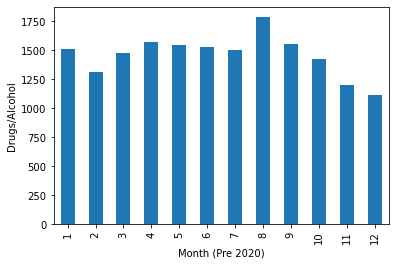

In [311]:
drug_alcohol_before_2020 = crimes_before_2020[(crimes_before_2020['OFFENSE_CATEGORY_ID_trim'] == "drug-alcohol")]
drug_alcohol_by_month = drug_alcohol_before_2020["first_occurrence_date_dt"].groupby(drug_alcohol_before_2020["first_occurrence_date_dt"].dt.month, axis=0).count().plot(kind = "bar", xlabel = "Month (Pre 2020)", ylabel = "Drugs/Alcohol")

In [312]:
#save clean data to csv
crimes.to_csv('crimes_python_clean.csv', index=False)
